In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc  


In [2]:
Survival = pd.read_csv('dataset.csv')


EDA

In [3]:
Survival.shape

(91713, 85)

In [4]:
pd.set_option('display.max_columns', None)
Survival.head()
# pd.reset_option('display.max_columns')

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [28]:
Survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   encounter_id                   91713 non-null  int64   
 1   patient_id                     91713 non-null  int64   
 2   hospital_id                    91713 non-null  int64   
 3   age                            87485 non-null  float64 
 4   bmi                            88284 non-null  float64 
 5   elective_surgery               91713 non-null  int64   
 6   ethnicity                      90318 non-null  category
 7   gender                         91688 non-null  category
 8   height                         90379 non-null  float64 
 9   icu_admit_source               91601 non-null  category
 10  icu_id                         91713 non-null  int64   
 11  icu_stay_type                  91713 non-null  category
 12  icu_type                       9

In [27]:
# change class
object_cols = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type']
Survival[object_cols] = Survival[object_cols].astype('category')

In [7]:
Survival['ethnicity'].unique()

['Caucasian', NaN, 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']
Categories (6, object): ['African American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other/Unknown']

In [8]:
Survival['icu_admit_source'].unique()

['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU', NaN]
Categories (5, object): ['Accident & Emergency', 'Floor', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU']

In [9]:
Survival['icu_stay_type'].unique()

['admit', 'readmit', 'transfer']
Categories (3, object): ['admit', 'readmit', 'transfer']

In [10]:
Survival['icu_type'].unique()

['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU', 'Cardiac ICU', 'CSICU']
Categories (8, object): ['CCU-CTICU', 'CSICU', 'CTICU', 'Cardiac ICU', 'MICU', 'Med-Surg ICU', 'Neuro ICU', 'SICU']

In [11]:
Survival['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

In [12]:
# remove column"Unnamed:83"
Survival.drop('Unnamed: 83', axis = 1, inplace = True)

In [13]:
# Calculate the proportion of NA
missing_percentage = (Survival.isnull().sum().sum() / (Survival.shape[0] * Survival.shape[1])) * 100

print("Percentage of missing values in the entire dataset: {:.2f}%".format(missing_percentage))
# dividing the total number of missing values by the total number of cells in the dataset

Percentage of missing values in the entire dataset: 2.55%


In [14]:
# Count the number of rows with NA values
rows_with_na = Survival[Survival.isnull().any(axis=1)].shape[0]

# Get the total number of rows
total_rows = Survival.shape[0]

# Calculate the percentage
percentage_rows_with_na = (rows_with_na / total_rows) * 100

print("Percentage of rows containing NA values in the total number of rows: {:.2f}%".format(percentage_rows_with_na))


Percentage of rows containing NA values in the total number of rows: 37.92%


In [15]:
Survival.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,0.000000,46.00000

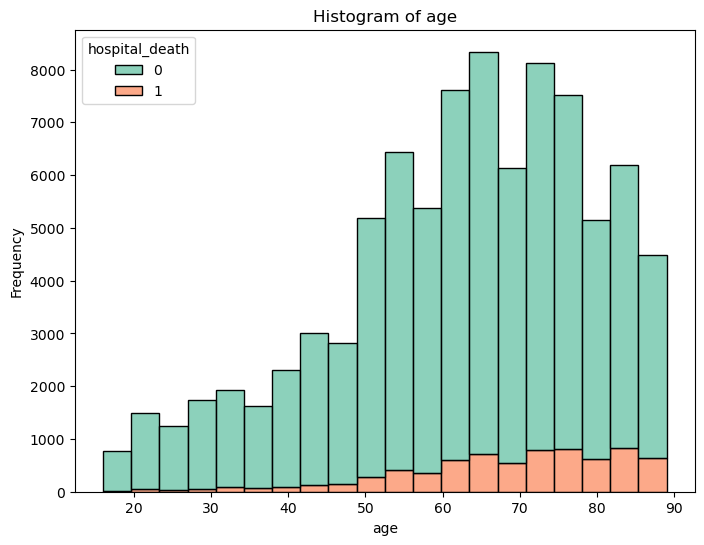

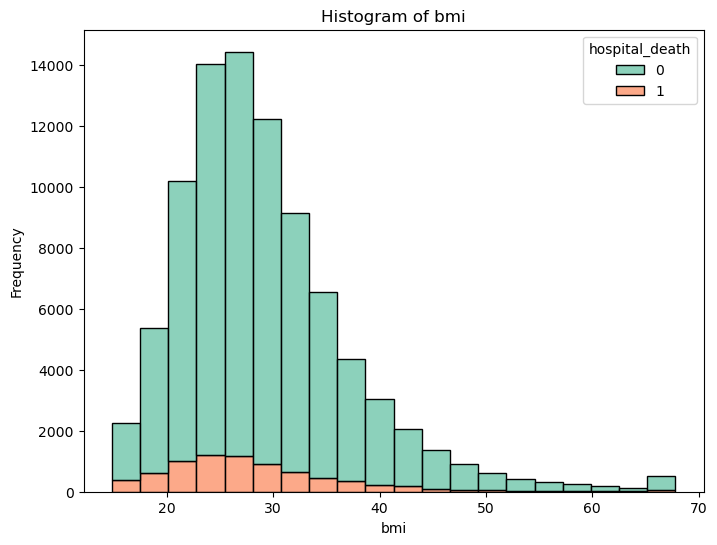

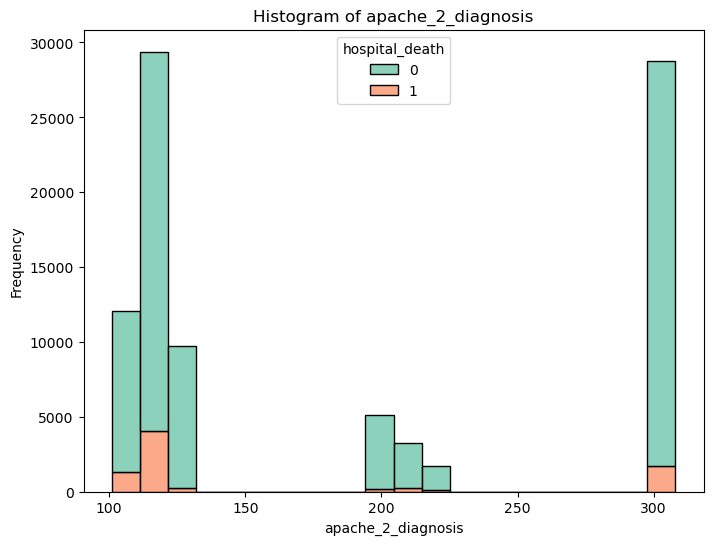

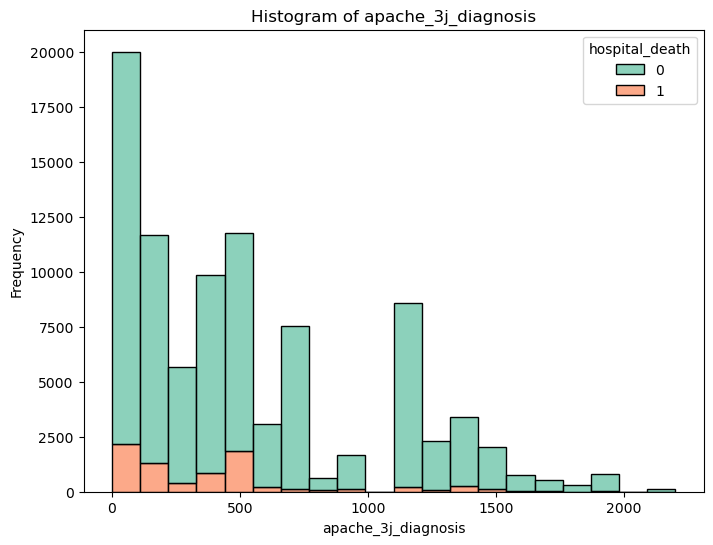

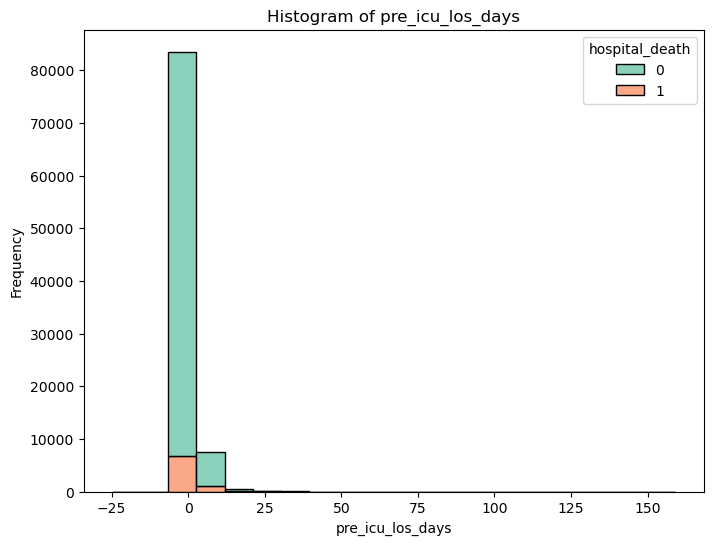

In [16]:
# check distributions of interested continuousu variable
# Create a list of variables to plot
var_cont = ['age', 'bmi', 'apache_2_diagnosis','apache_3j_diagnosis', 'pre_icu_los_days']  # Replace with the names of variables you want to plot

# Plot histograms for each variable
for var in var_cont:
    plt.figure(figsize=(8, 6))  # Set the size of the plot area
    sns.histplot(data=Survival, x=var, bins=20, hue='hospital_death', multiple='stack', palette='Set2')  # Plot the histogram with color differentiation
    plt.title('Histogram of {}'.format(var))  # Set the title
    plt.xlabel(var)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Show the histogram


In [17]:
# Outcome variable
Survival.hospital_death.value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

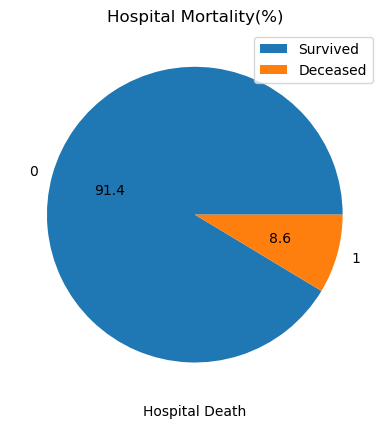

In [18]:
Survival.hospital_death.value_counts().plot(kind='pie', autopct="%.1f", title='Hospital Mortality(%)')
# Add labels
plt.ylabel('')  # Remove y-axis label
plt.xlabel('Hospital Death')  # Add x-axis label
plt.legend(labels=['Survived', 'Deceased'], loc='upper right')  # Add legend with custom labels

plt.show()

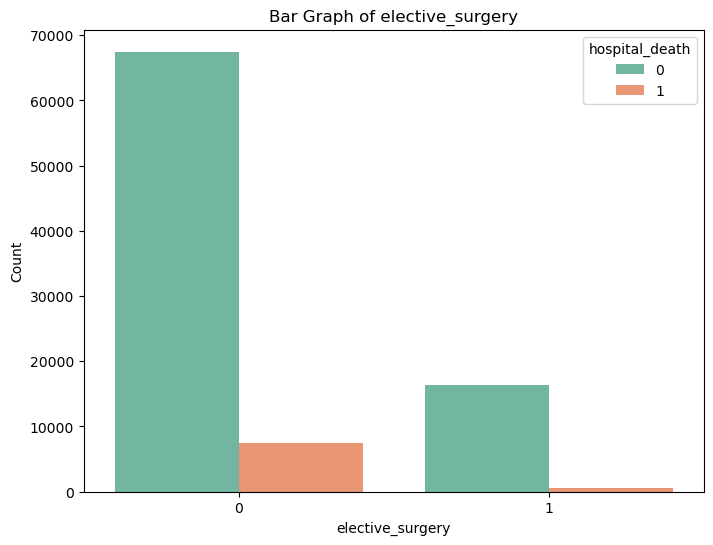

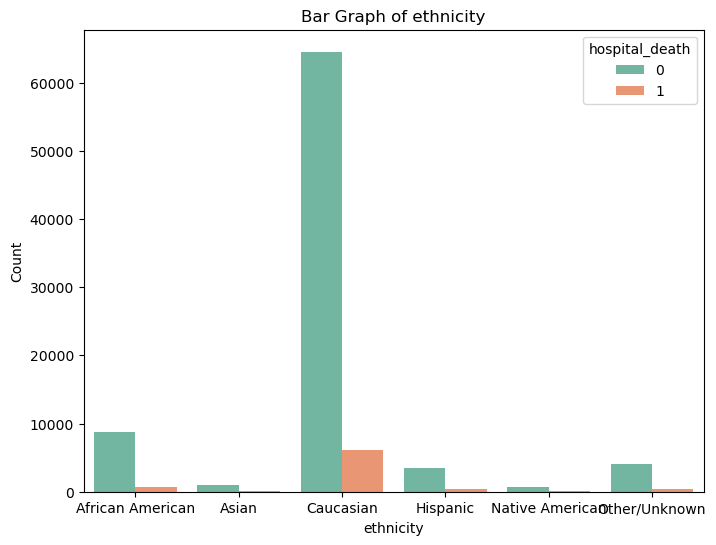

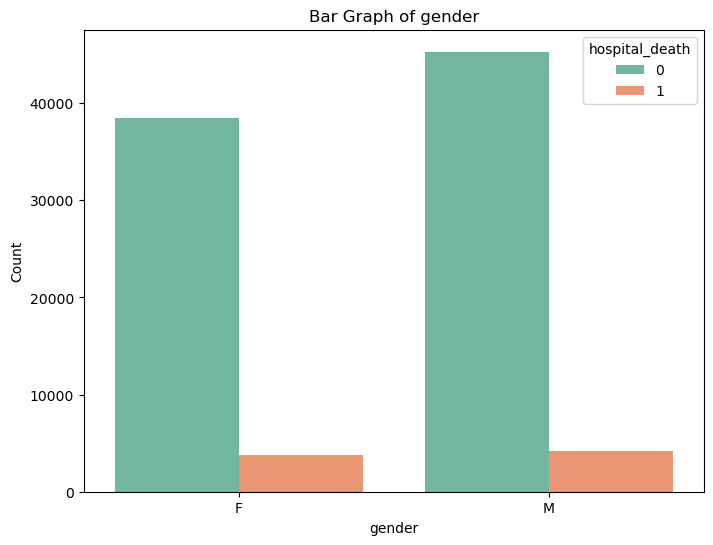

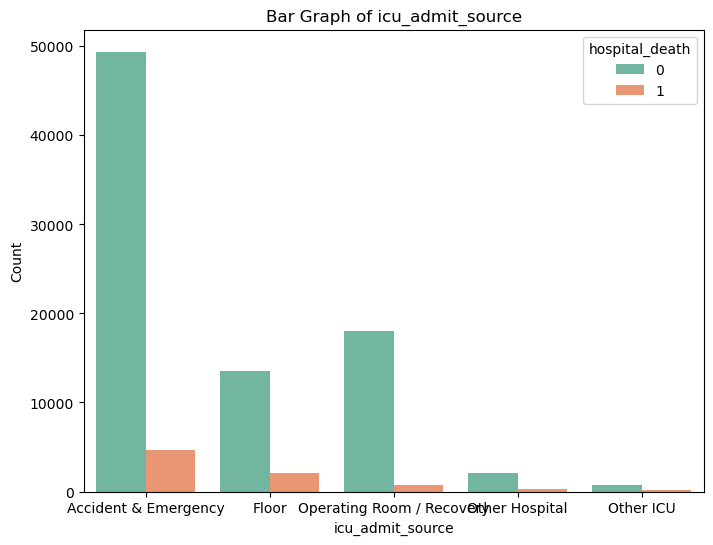

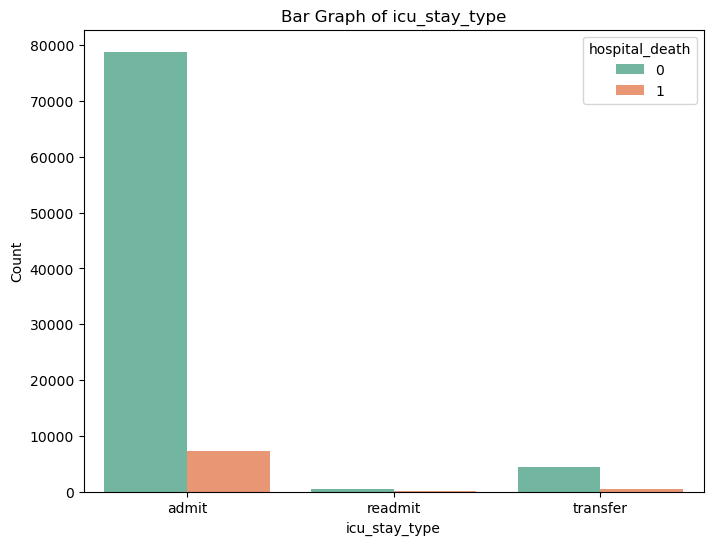

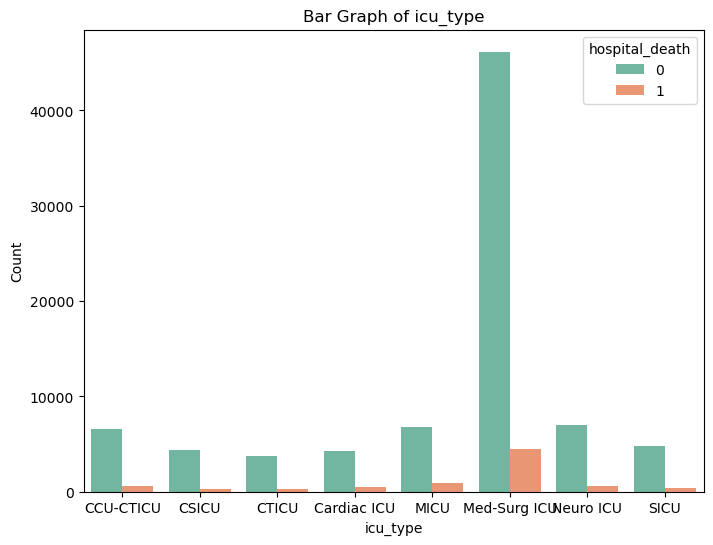

In [32]:
# Convert object type columns to categorical variables
categorical_cols = ['elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type']  

# Plot bar graphs for each categorical variable
for var in categorical_cols:
    plt.figure(figsize=(8, 6))  # Set the size of the plot area
    sns.countplot(data=Survival, x=var, hue='hospital_death', palette='Set2')  # Plot the bar graph with color differentiation
    plt.title('Bar Graph of {}'.format(var))  # Set the title
    plt.xlabel(var)  # Set the x-axis label
    plt.ylabel('Count')  # Set the y-axis label
    plt.legend(title='hospital_death', loc='upper right')  # Add legend
    plt.show()  # Show the bar graph



# Apache II　vs Apache III
plt.figure(figsize=(8, 6))
plt.scatter(Survival['apache_2_diagnosis'], Survival['apache_3_diagnosis'], alpha=0.5)
plt.title('Scatter Plot of Apache II vs Apache III Diagnosis')
plt.xlabel('Apache II Diagnosis')
plt.ylabel('Apache III Diagnosis')
plt.grid(True)
plt.show()

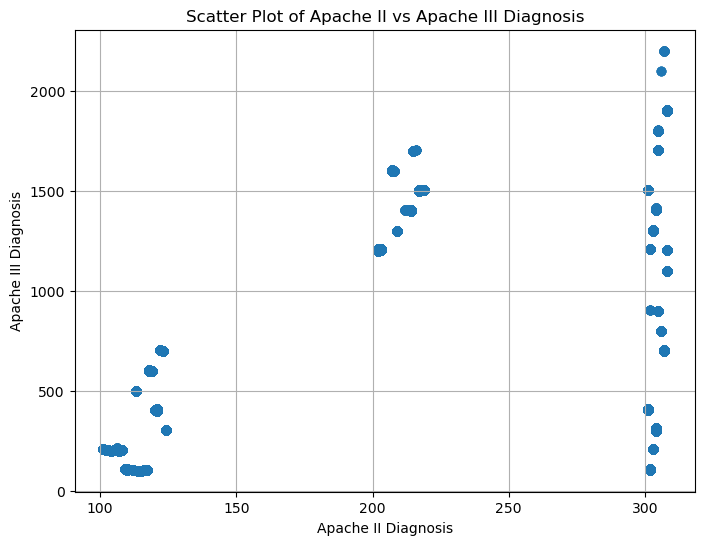

Correlation between Apache II and Apache III diagnoses: 0.3931101842815976


In [23]:
# Apache II　vs Apache III
plt.figure(figsize=(8, 6))
plt.scatter(Survival['apache_2_diagnosis'], Survival['apache_3j_diagnosis'], alpha=0.5)
plt.title('Scatter Plot of Apache II vs Apache III Diagnosis')
plt.xlabel('Apache II Diagnosis')
plt.ylabel('Apache III Diagnosis')
plt.grid(True)
plt.show()

correlation = Survival['apache_2_diagnosis'].corr(Survival['apache_3j_diagnosis'])
print("Correlation between Apache II and Apache III diagnoses:", correlation)

Apache II and Apache II do not necessarily show collinearity based on scatter plots and correlation values.

In [46]:
# Variavle Selection form EDA abd privious knowledge
y = Survival['hospital_death']
X1 = Survival[['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender','icu_admit_source','icu_stay_type', 'icu_type', 'pre_icu_los_days',
                'apache_2_diagnosis','apache_3j_diagnosis', 'aids', 'cirrhosis', 'diabetes_mellitus',
				'hepatic_failure','immunosuppression','leukemia', 'lymphoma','solid_tumor_with_metastasis']]
X1 = pd.get_dummies(X1)
							

In [47]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X1= imputer.fit_transform(X1)

In [49]:
# Logitstic Regression
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Define and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

/Users/yutatsukumo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9131548819713242
Confusion Matrix:
 [[16744    12]
 [ 1581     6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16756
           1       0.33      0.00      0.01      1587

    accuracy                           0.91     18343
   macro avg       0.62      0.50      0.48     18343
weighted avg       0.86      0.91      0.87     18343



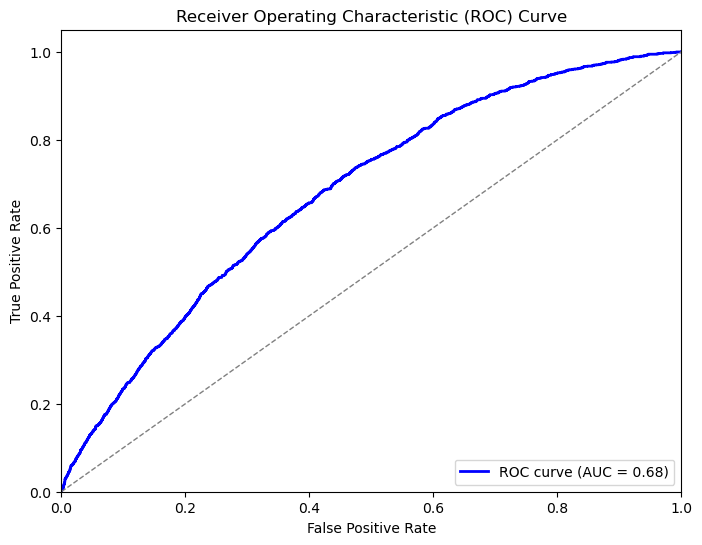

In [54]:
# Make predictions using the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Compute ROC curve
roc_auc = auc(fpr, tpr)  # Compute area under the ROC curve (AUC)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

